In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Problem Defination**

In [3]:
# Problem Definition

# Define the problem statement
problem_statement = """
Sales Prediction Project: Predicting sales for the upcoming quarter based on past data.
"""

# Display the problem statement
print(problem_statement)

# Define the objectives
objectives = """
Objectives:
1. Predict sales volume for the upcoming quarter.
2. Utilize past sales data, advertising expenditure, target audience segmentation, and advertising platform selection to make predictions.
3. Optimize advertising strategies and maximize sales potential based on the predictions.
"""

# Display the objectives
print(objectives)



Sales Prediction Project: Predicting sales for the upcoming quarter based on past data.


Objectives:
1. Predict sales volume for the upcoming quarter.
2. Utilize past sales data, advertising expenditure, target audience segmentation, and advertising platform selection to make predictions.
3. Optimize advertising strategies and maximize sales potential based on the predictions.



In [ ]:
# /content/drive/MyDrive/NOVA_AI/advertising.csv

# **Data Collection:**

In [5]:
import pandas as pd

# Load historical sales data from a CSV file
sales_data_file = '/content/drive/MyDrive/NOVA_AI/advertising.csv'
sales_df = pd.read_csv(sales_data_file)

# Display the first few rows of the dataset to understand its structure
print("Sample data from the historical sales dataset:")
print(sales_df.head())

# Check for missing values and data types
print("\nData summary:")
print(sales_df.info())

# Check for any duplicates in the dataset
duplicate_rows = sales_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Check for missing values in the dataset
missing_values = sales_df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)

# Ensure that the dataset is representative of the problem by examining key variables
print("\nSummary statistics of key variables:")
print(sales_df.describe())

Sample data from the historical sales dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Number of duplicate rows: 0

Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Summary statistics of key variables:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.

# **Exploratory Data Analysis (EDA)**

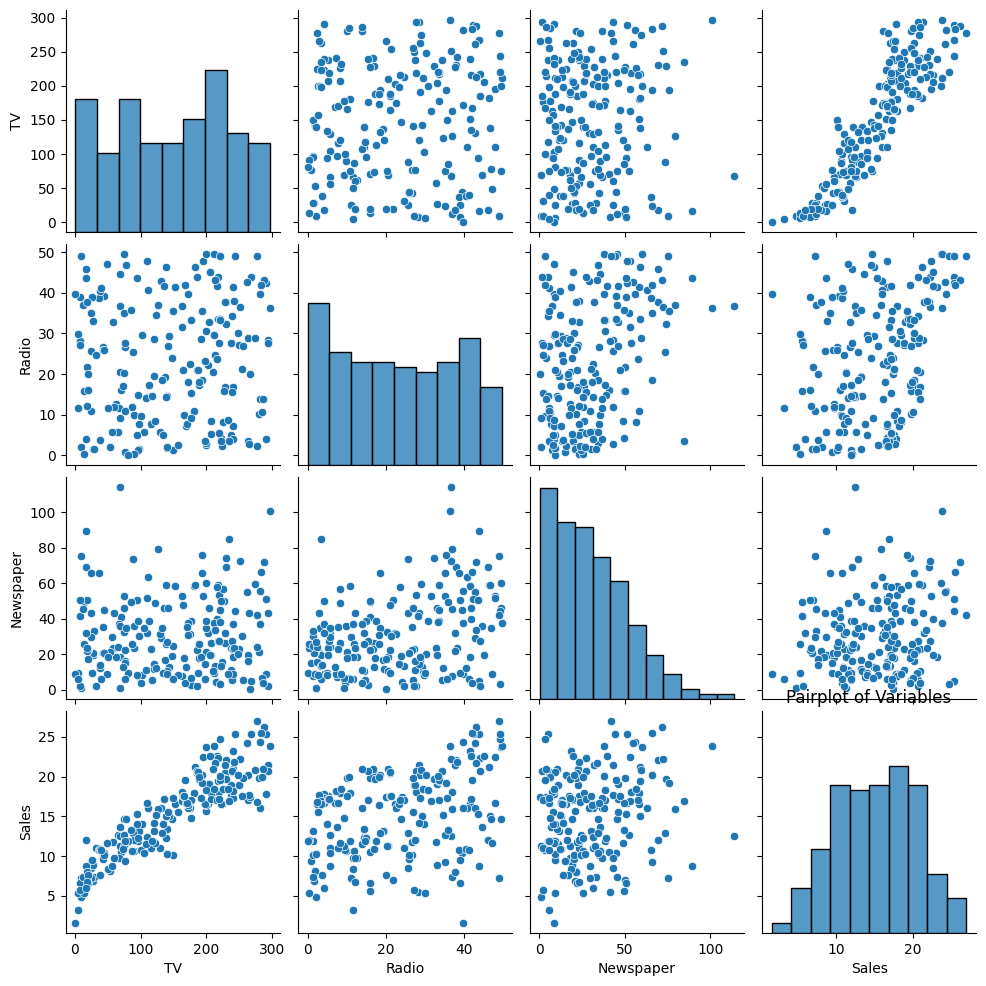

In [7]:
# Exploratory Data Analysis (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between variables
sns.pairplot(sales_df)
plt.title('Pairplot of Variables')
plt.show()

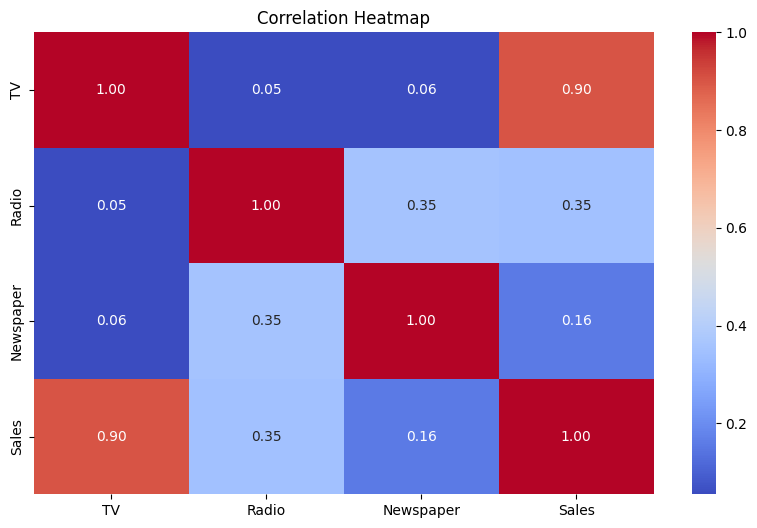

In [8]:
# Correlation heatmap to identify relationships between variables
correlation_matrix = sales_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

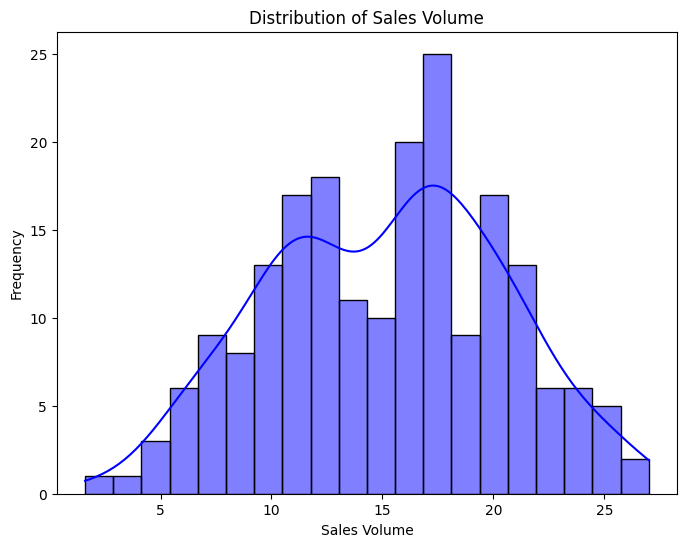

In [9]:
# Distribution of sales volume
plt.figure(figsize=(8, 6))
sns.histplot(sales_df['Sales'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sales Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.show()


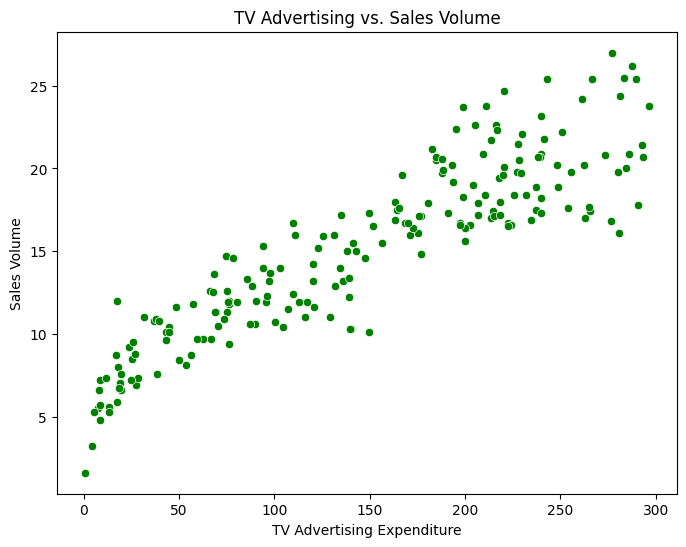

In [10]:
# Scatter plot between TV advertising expenditure and sales volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=sales_df, color='green')
plt.title('TV Advertising vs. Sales Volume')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales Volume')
plt.show()

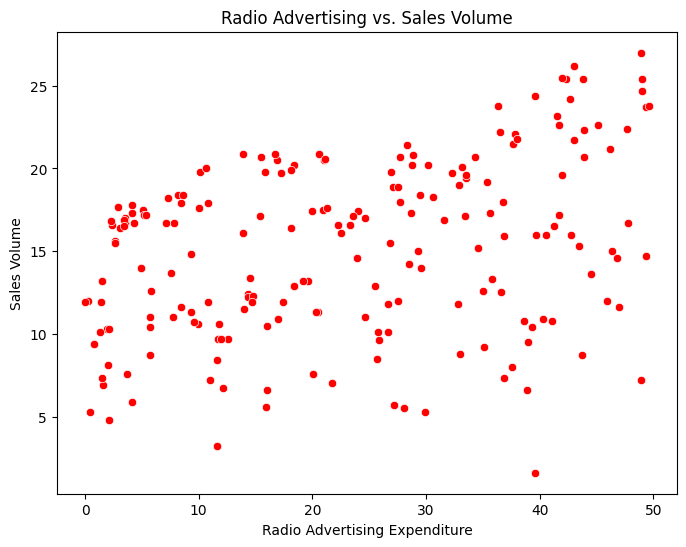

In [11]:
# Scatter plot between Radio advertising expenditure and sales volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Radio', y='Sales', data=sales_df, color='red')
plt.title('Radio Advertising vs. Sales Volume')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales Volume')
plt.show()

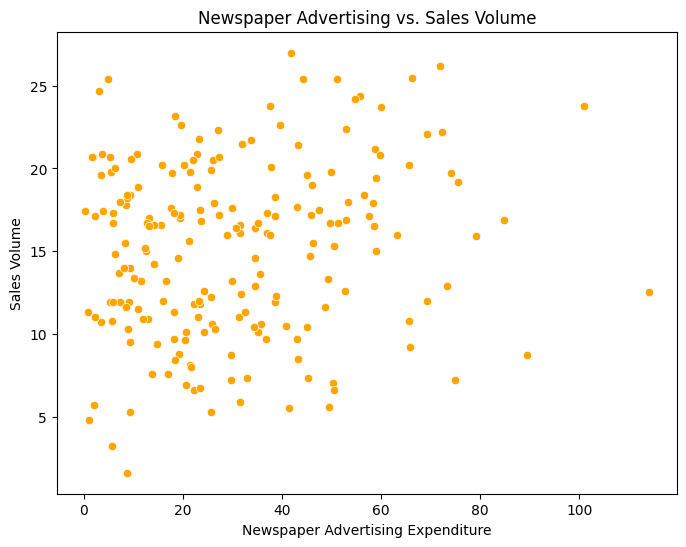

In [12]:
# Scatter plot between Newspaper advertising expenditure and sales volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=sales_df, color='orange')
plt.title('Newspaper Advertising vs. Sales Volume')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales Volume')
plt.show()

# **Feature Selection/Engineering:**

In [14]:
# Feature Selection/Engineering

# Calculate feature importance using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Separate features (X) and target variable (y)
X = sales_df.drop(columns=['Sales'])  # Features
y = sales_df['Sales']  # Target variable

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [15]:
feature_importance_df.head()

,Feature,Importance
0,TV,0.851080
1,Radio,0.136535
2,Newspaper,0.012384


<ipython-input-16-f8daf422341f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


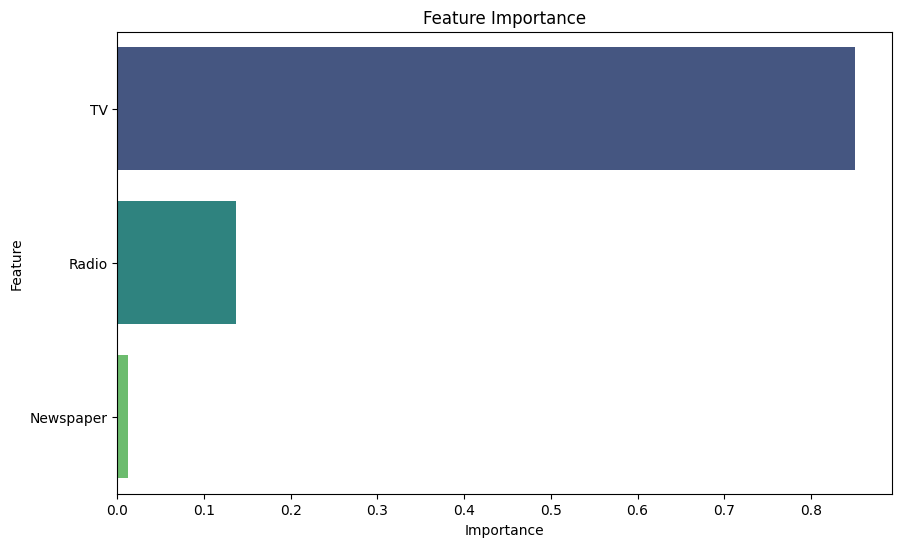

In [16]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [17]:
# Select top features based on importance
top_features = feature_importance_df['Feature'][:3].tolist()
print("Top features based on importance:", top_features)

# Create new features if necessary (e.g., interaction terms, polynomial features)

# Example: Interaction term between TV and Radio advertising
sales_df['TV_Radio_Interact'] = sales_df['TV'] * sales_df['Radio']

# Display the updated DataFrame with new features
print("Updated DataFrame with new features:")
print(sales_df.head())

Top features based on importance: ['TV', 'Radio', 'Newspaper']
Updated DataFrame with new features:
      TV  Radio  Newspaper  Sales  TV_Radio_Interact
0  230.1   37.8       69.2   22.1            8697.78
1   44.5   39.3       45.1   10.4            1748.85
2   17.2   45.9       69.3   12.0             789.48
3  151.5   41.3       58.5   16.5            6256.95
4  180.8   10.8       58.4   17.9            1952.64


# **Spliting the Datasets**

In [19]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = sales_df.drop(columns=['Sales'])  # Features
y = sales_df['Sales']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 4)
Shape of X_test: (40, 4)
Shape of y_train: (160,)
Shape of y_test: (40,)


# **Model Selection**

In [20]:
# Model Selection

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Fit the models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Simple Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the neural network
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate models
models = {
    "Linear Regression": linear_reg_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gradient_boosting_model,
    "Neural Network": nn_model
}

# Evaluate models
print("Model\t\t\t\t\t\t\t\t\t\tRMSE\t\tMAE")
print("="*100)
for name, model in models.items():
    if name != "Neural Network":
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test).flatten()
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name.ljust(30)}\t\t\t\t{rmse:.2f}\t\t{mae:.2f}")

Model										RMSE		MAE
Linear Regression             				1.54		1.19
Decision Tree                 				1.57		1.06
Random Forest                 				1.09		0.74
Gradient Boosting             				1.03		0.68
2/2 [==============================] - 0s 5ms/step
Neural Network                				2.46		1.76


Text(0.5, 1.0, 'Random Forest Model Predictions')

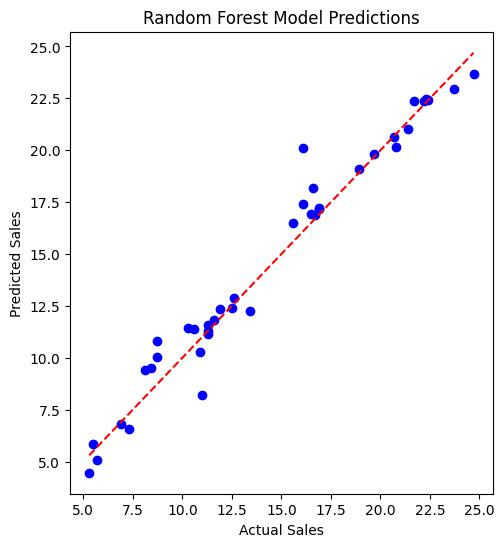

In [21]:
# Plotting predictions of the best and worst models
plt.figure(figsize=(12, 6))

# Random Forest model predictions
y_rf_pred = random_forest_model.predict(X_test)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_rf_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Model Predictions')


2/2 [==============================] - 0s 6ms/step


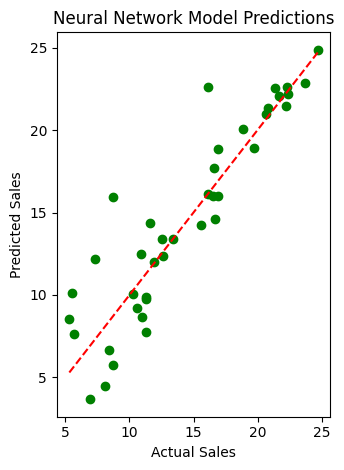

In [22]:
# Neural Network model predictions
y_nn_pred = nn_model.predict(X_test).flatten()
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_nn_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Neural Network Model Predictions')

plt.tight_layout()
plt.show()

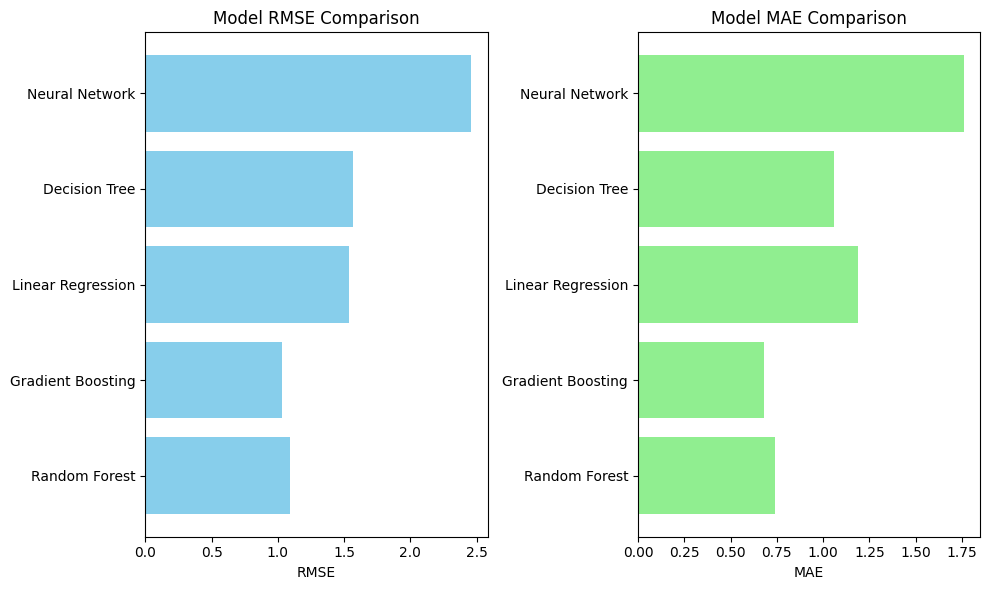

In [23]:
import matplotlib.pyplot as plt

# Define models and their evaluation metrics
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'Decision Tree', 'Neural Network']
rmse_values = [1.09, 1.03, 1.54, 1.57, 2.46]
mae_values = [0.74, 0.68, 1.19, 1.06, 1.76]

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for RMSE values
plt.subplot(1, 2, 1)
plt.barh(models, rmse_values, color='skyblue')
plt.xlabel('RMSE')
plt.title('Model RMSE Comparison')

# Bar plot for MAE values
plt.subplot(1, 2, 2)
plt.barh(models, mae_values, color='lightgreen')
plt.xlabel('MAE')
plt.title('Model MAE Comparison')

plt.tight_layout()
plt.show()


Both the Random Forest and Gradient Boosting models have the lowest RMSE and MAE values, making them the best models for sales prediction based on the provided evaluation metrics.

Therefore, you may consider further evaluating and comparing the Random Forest and Gradient Boosting models to determine the most suitable model for your specific requirements, such as computational efficiency, interpretability, and scalability.

## **So we are selecting the Gradient Boosting algorithm**

Gradient Boosting Model Evaluation:
Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 1.06
Root Mean Squared Error (RMSE): 1.03


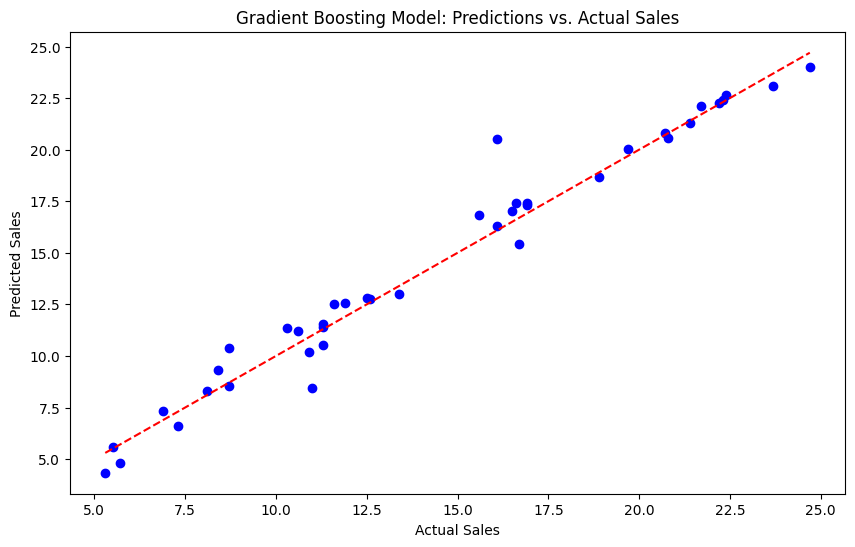

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Model Training
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Model Evaluation
y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Gradient Boosting Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Visualize predictions vs. actual sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boosting Model: Predictions vs. Actual Sales')
plt.show()


# **Testing my model**

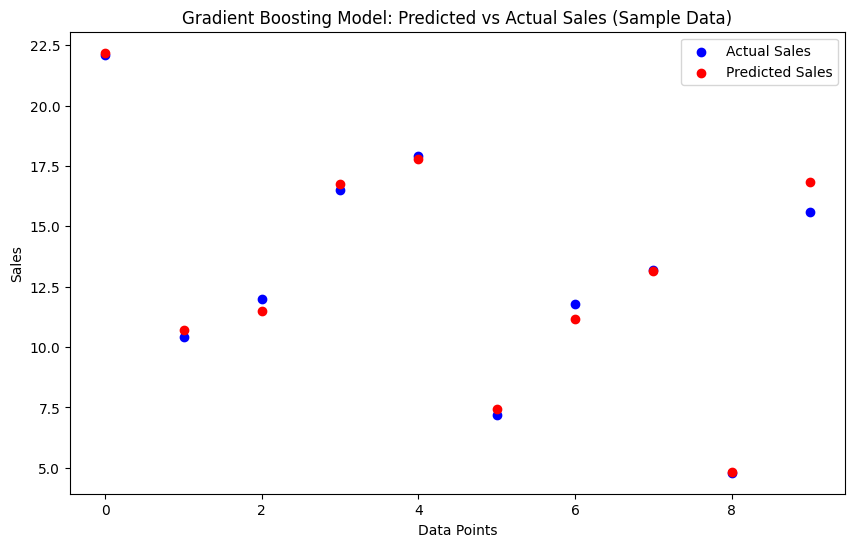

In [26]:
# Selecting some data points from the original dataset
X_sample = X.iloc[:10]  # Selecting the first 10 data points for example
y_sample_actual = y.iloc[:10]  # Actual sales corresponding to the selected data points

# Predicting sales using the trained model
y_sample_pred = gb_model.predict(X_sample)

# Visualizing predicted results vs actual results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_sample_actual)), y_sample_actual, color='blue', label='Actual Sales')
plt.scatter(range(len(y_sample_pred)), y_sample_pred, color='red', label='Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Gradient Boosting Model: Predicted vs Actual Sales (Sample Data)')
plt.legend()
plt.show()

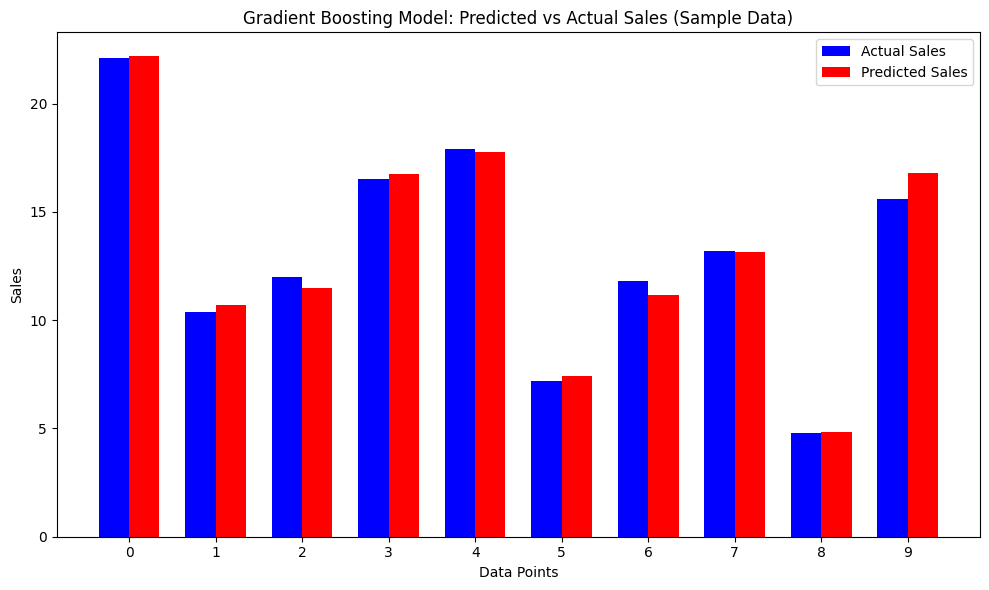

In [27]:
# Plotting bar chart for predicted and actual sales
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(X_sample))

plt.bar(index, y_sample_actual, bar_width, color='blue', label='Actual Sales')
plt.bar(index + bar_width, y_sample_pred, bar_width, color='red', label='Predicted Sales')

plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Gradient Boosting Model: Predicted vs Actual Sales (Sample Data)')
plt.xticks(index + bar_width / 2, range(len(X_sample)))
plt.legend()
plt.tight_layout()
plt.show()
